In [ ]:
!pip install -- upgrade


In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes  import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,classification_report, roc_auc_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline



c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df=pd.read_csv(r'C:\Users\hp\Downloads\archive (27)\heart.csv')
#df=pd.read_csv(r'C:\Users\PC\Downloads\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Description of columns

age: The age of the patient.

sex: Gender of the patient (0: female, 1: male).

cp: Type of chest pain.

    Value 1: typical angina

    Value 2: atypical angina
    
    Value 3: non-anginal pain
    
    Value 4: asymptomatic

trestbps: Resting blood pressure.

chol: Serum cholesterol.

fbs: Fasting blood sugar > 120 mg/dl.

restecg: Resting electrocardiographic results.

    Value 0: normal
    
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: Maximum heart rate achieved.

exang: Exercise induced angina.

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal - results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)

target - representing diagnosis of heart disease (angiographic disease status) in any major vessel

    Value 0: < 50% diameter narrowing

    Value 1: > 50% diameter narrowing

# EDA - Exploratory Data Analysis

In [4]:
print(df.shape)


(1025, 14)


In [5]:
df.duplicated().sum()

723

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
None


In [8]:
print(df.describe().T)

          count        mean        std    min     25%    50%     75%    max
age       302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0
sex       302.0    0.682119   0.466426    0.0    0.00    1.0    1.00    1.0
cp        302.0    0.963576   1.032044    0.0    0.00    1.0    2.00    3.0
trestbps  302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0
chol      302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0
fbs       302.0    0.149007   0.356686    0.0    0.00    0.0    0.00    1.0
restecg   302.0    0.526490   0.526027    0.0    0.00    1.0    1.00    2.0
thalach   302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0
exang     302.0    0.327815   0.470196    0.0    0.00    0.0    1.00    1.0
oldpeak   302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2
slope     302.0    1.397351   0.616274    0.0    1.00    1.0    2.00    2.0
ca        302.0    0.718543   1.006748    0.0    0.00    0.0    1.00    4.0
thal      30

In [9]:
df.duplicated().sum()


0

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()


0

In [12]:
df.isnull().sum().sum()

0

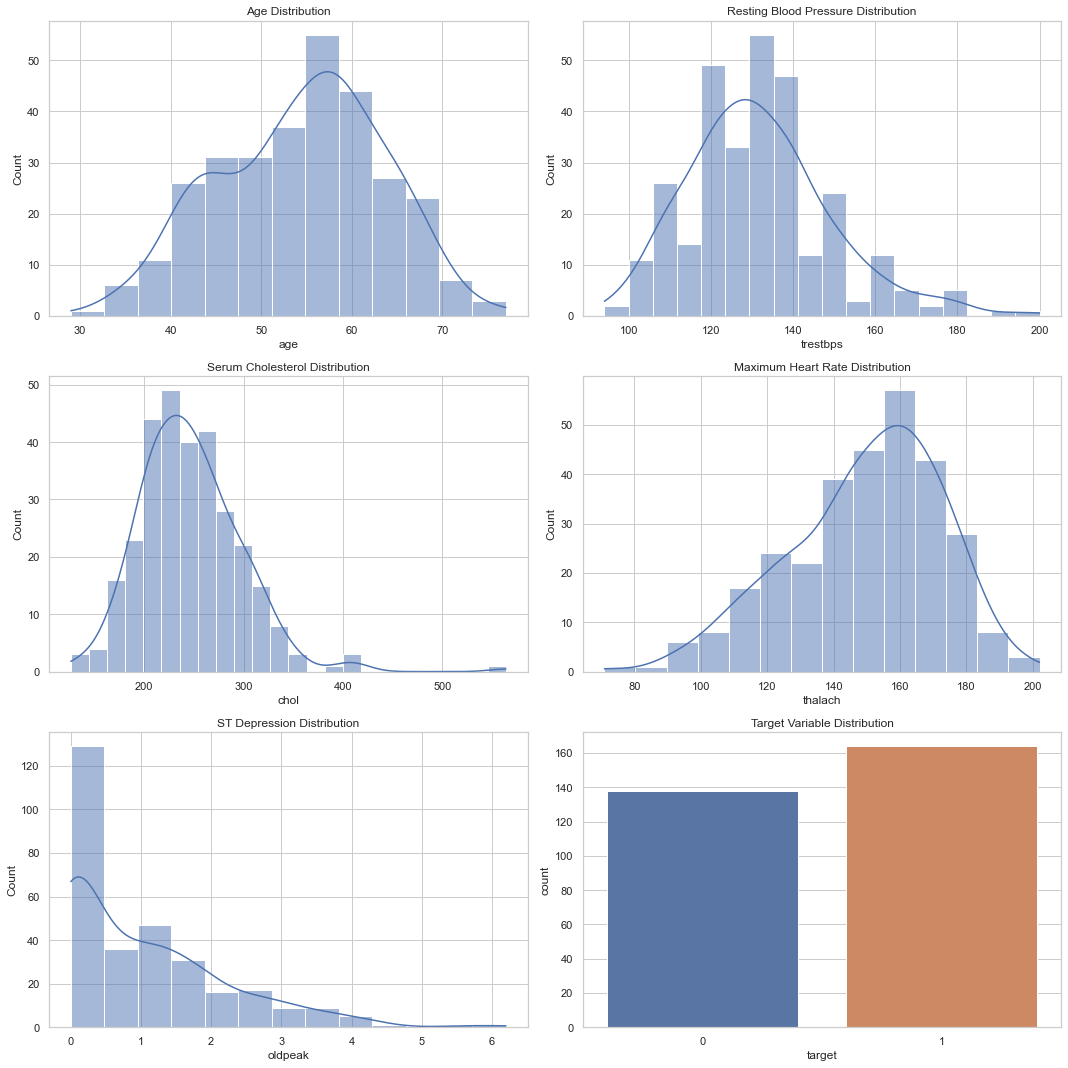

In [13]:

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting distributions of various features
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Age distribution
sns.histplot(df['age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

# Distribution of resting blood pressure (trestbps)
sns.histplot(df['trestbps'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Resting Blood Pressure Distribution')

# Serum cholesterol distribution
sns.histplot(df['chol'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Serum Cholesterol Distribution')

# Maximum heart rate achieved distribution
sns.histplot(df['thalach'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Maximum Heart Rate Distribution')

# Distribution of ST depression (oldpeak)
sns.histplot(df['oldpeak'], kde=True, ax=axs[2, 0])
axs[2, 0].set_title('ST Depression Distribution')

# Count of target variable
sns.countplot(x='target', data=df, ax=axs[2, 1])
axs[2, 1].set_title('Target Variable Distribution')

plt.tight_layout()
plt.show()

# Feature Engineering

In [14]:
def find_outliers(dataframe):
    outliers = {}
    for column in dataframe.select_dtypes(include=['float64', 'int64']):
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifying the outliers
        outlier_condition = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
        outliers[column] = dataframe[outlier_condition]
    return outliers

In [15]:
# Applying the function to the DataFrame
outliers_dict = find_outliers(df)

In [17]:
# Summarizing the number of outliers in each column
outliers_summary = {col: outliers_dict[col].shape[0] for col in outliers_dict}
print(outliers_summary)

{'age': 0, 'sex': 0, 'cp': 0, 'trestbps': 9, 'chol': 5, 'fbs': 45, 'restecg': 0, 'thalach': 1, 'exang': 0, 'oldpeak': 5, 'slope': 0, 'ca': 24, 'thal': 2, 'target': 0}


In [18]:
# Calculating the correlation of each column with the target column
correlation_with_target = df.corr()['target'].drop('target')  # Dropping the target vs target correlation


In [19]:
# Sorting the correlations for better readability
sorted_correlations = correlation_with_target.sort_values(ascending=False)

In [20]:
print(sorted_correlations)

cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


In [21]:
#Splitting the data into features and target
X = df.drop('target', axis=1)
y = df['target']

In [22]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Scaling the features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Machine Learning Models

In [30]:
# Function to apply various ML algorithms
def evaluate_models_accuracy(models, X_train, y_train, X_test, y_test):
    results = {}
    confusion_matrices = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices[name] = cm
        results[name] = accuracy
    return results, confusion_matrices

In [45]:
# Defining the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "CatBoost": CatBoostClassifier(silent=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "LightGBM": LGBMClassifier()
}

In [46]:
# Evaluating the models
model_results, model_conf_matrices= evaluate_models_accuracy(models, X_train_scaled, y_train, X_test_scaled, y_test)
model_results_sorted = dict(sorted(model_results.items(), key=lambda item: item[1], reverse=True))
model_results_sorted




[LightGBM] [Info] Number of positive: 135, number of negative: 106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560166 -> initscore=0.241836
[LightGBM] [Info] Start training from score 0.241836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

{'Random Forest': 0.8688524590163934,
 'Naive Bayes': 0.8524590163934426,
 'CatBoost': 0.8360655737704918,
 'SVM': 0.819672131147541,
 'Logistic Regression': 0.8032786885245902,
 'XGBoost': 0.8032786885245902,
 'LightGBM': 0.8032786885245902,
 'KNN': 0.7868852459016393,
 'AdaBoost': 0.7868852459016393,
 'Decision Tree': 0.7377049180327869}

# Accuracy Visualization

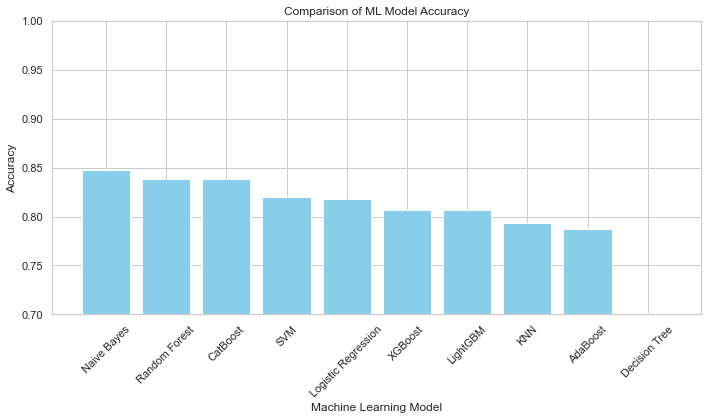

In [44]:
# Visualizing the accuracies of the different ML algorithms

plt.figure(figsize=(10, 6))
plt.bar(model_results_sorted.keys(), model_results_sorted.values(), color='skyblue')
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Comparison of ML Model Accuracy')
plt.xticks(rotation=45)
plt.ylim([0.7, 1.0])
plt.tight_layout()

plt.show()

In [35]:
def plot_confusion_matrices(confusion_matrices):
    # Set up the matplotlib figure with 2 columns and 5 rows
    fig, axs = plt.subplots(5, 2, figsize=(10, 20))

    for i, (name, cm) in enumerate(confusion_matrices.items()):
        row = i // 2  # Integer division to get the row index
        col = i % 2   # Modulus to get the column index

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[row, col])
        axs[row, col].set_title(name)
        axs[row, col].set_xlabel('Predicted')
        axs[row, col].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

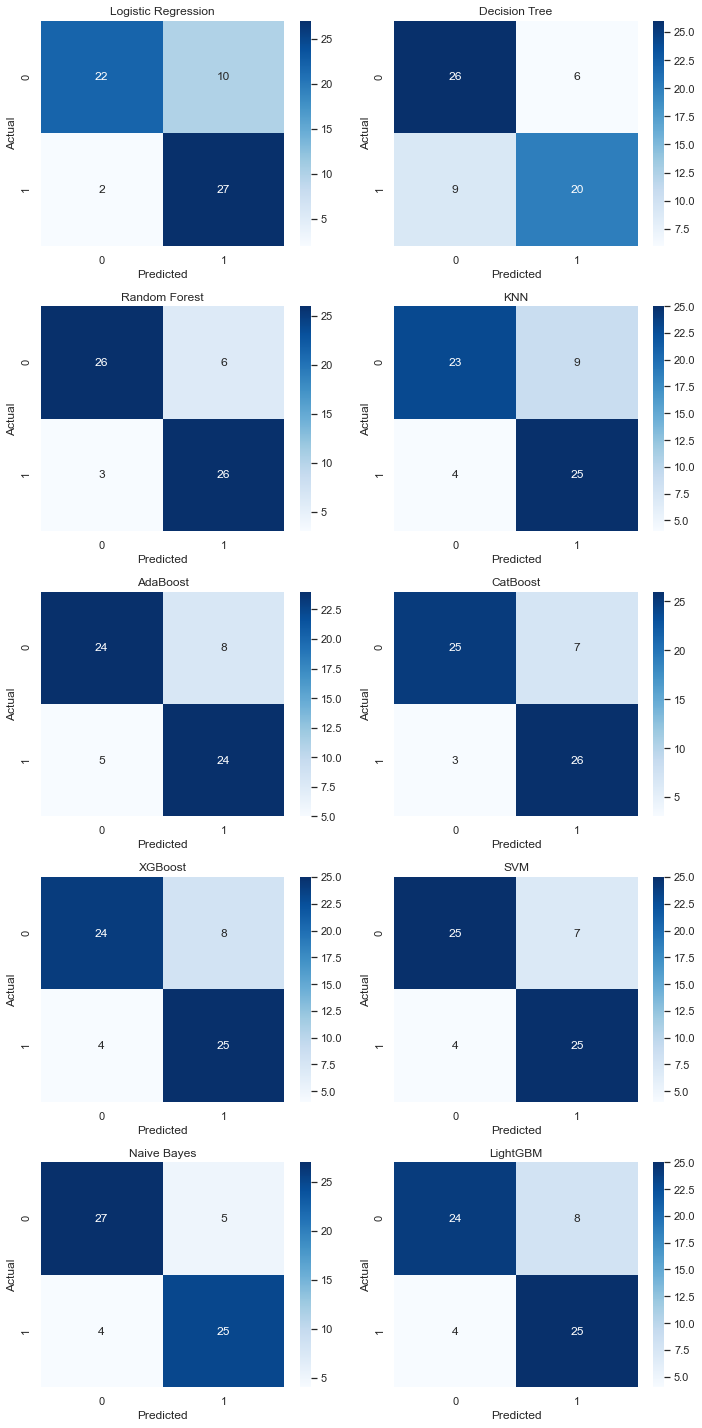

In [36]:
 plot_confusion_matrices(model_conf_matrices)

# Evaluating F1 Score

In [51]:
# Function to apply various ML algorithms
def evaluate_models_f1_score(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 =  f1_score(y_test, y_pred)
        results[name] = f1
        
    return results

In [57]:
model_results= evaluate_models_f1_score(models, X_train_scaled, y_train, X_test_scaled, y_test)
model_results_sorted = dict(sorted(model_results.items(), key=lambda item: item[1], reverse=True))
model_results_sorted


[LightGBM] [Info] Number of positive: 135, number of negative: 106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560166 -> initscore=0.241836
[LightGBM] [Info] Start training from score 0.241836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

{'Random Forest': 0.8524590163934426,
 'Naive Bayes': 0.847457627118644,
 'CatBoost': 0.8387096774193549,
 'SVM': 0.8196721311475409,
 'Logistic Regression': 0.8181818181818181,
 'XGBoost': 0.8064516129032258,
 'LightGBM': 0.8064516129032258,
 'KNN': 0.7936507936507937,
 'AdaBoost': 0.7868852459016394,
 'Decision Tree': 0.7017543859649122}

In [58]:
#Visualizing the F1
def visualize_f1_scores(f1_scores):
    plt.figure(figsize=(10, 6))
    plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
    plt.xlabel('Machine Learning Algorithms')
    plt.ylabel('F1 Score')
    plt.title('Comparison of ML Algorithm F1 Scores')
    plt.xticks(rotation=45)
    plt.ylim([0.5, 1])  # F1 score ranges from 0 to 1
    plt.tight_layout()

    plt.show()

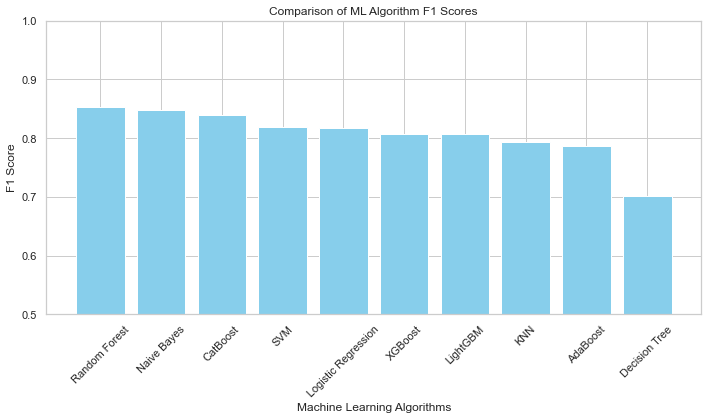

In [59]:
visualize_f1_scores(model_results_sorted)

# Hyperparameter Tuning

# GridsearchCV with Random Forest

In [68]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier())
])

# Parameters grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Setting up the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fitting GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Getting the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'classifier__bootstrap': True, 'classifier__max_depth': 30, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Score: 0.8571623061848935
